<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [4]:
sat_df = pd.read_csv('sat_scores.csv')
print(sat_df.head(10))
print("Index, State, Student's Rating, Verbal Scores, & Math Scores")

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501
Index, State, Student's Rating, Verbal Scores, & Math Scores


### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [5]:
print(sat_df.dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
print(sat_df.head(10))
print("Our data gives us the verbal and math score of a student, as well as their rating, and the state which they took the SAT in.")

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501
Our data gives us the verbal and math score of a student, as well as their rating, and the state which they took the SAT in.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
from pprint import pprint
# name of each column
# type of the column
# description of column
# shape of dataset
sat_df_description_dict = {
    "Column 1" : "State, OBJECT type, Student's State",
    "Column 2" : "Rate, INT type, Studen't Rating",
    "Column 3" : "Verbal, INT type, Student's Verbal Score",
    "Column 4" : "Math, INT type, Student's Math Score",
    "Shape" : "52, 4"
}
print(sat_df.shape)
pprint(sat_df_description_dict)

(52, 4)
{'Column 1': "State, OBJECT type, Student's State",
 'Column 2': "Rate, INT type, Studen't Rating",
 'Column 3': "Verbal, INT type, Student's Verbal Score",
 'Column 4': "Math, INT type, Student's Math Score",
 'Shape': '52, 4'}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

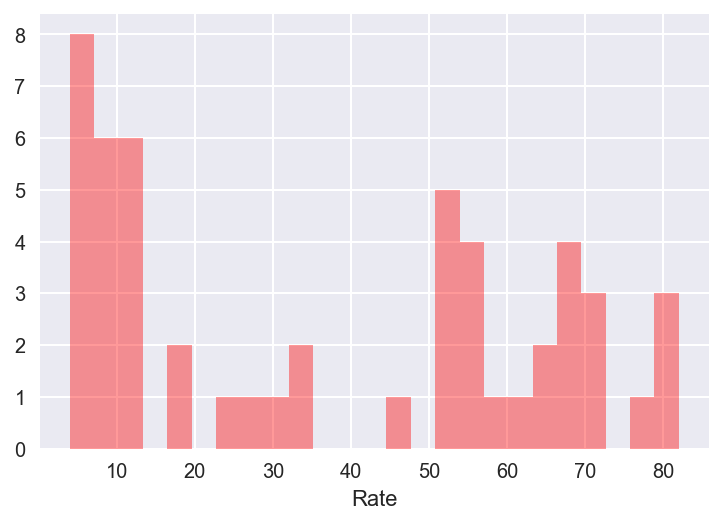

In [8]:
rate_plot = sns.distplot(sat_df['Rate'], bins = 25, kde = False, color='red')

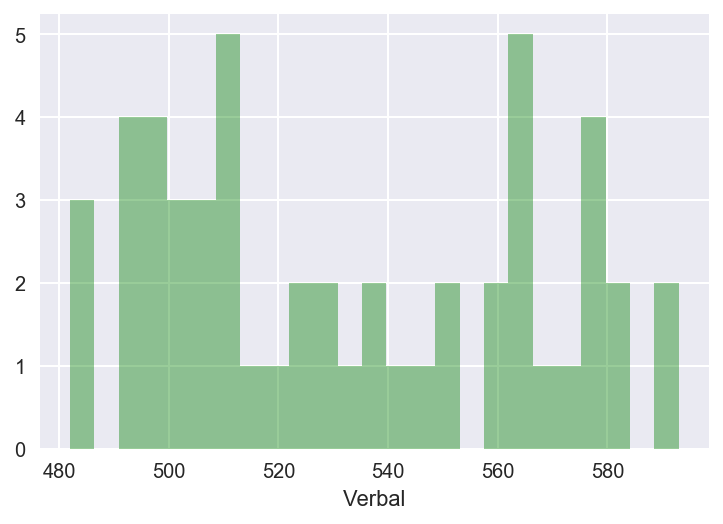

In [9]:
verb_plot = sns.distplot(sat_df['Verbal'], bins=25, kde = False, color='green')

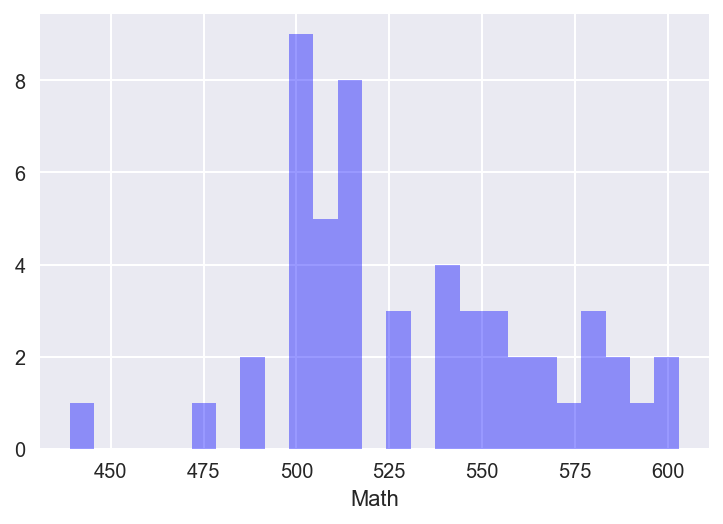

In [10]:
math_plot = sns.distplot(sat_df['Math'], bins=25, kde = False, color='blue')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

Observations:
Rate x Verbal and Rate x Math have a general negative correlation. 
Math x Verbal has a general positive correlation



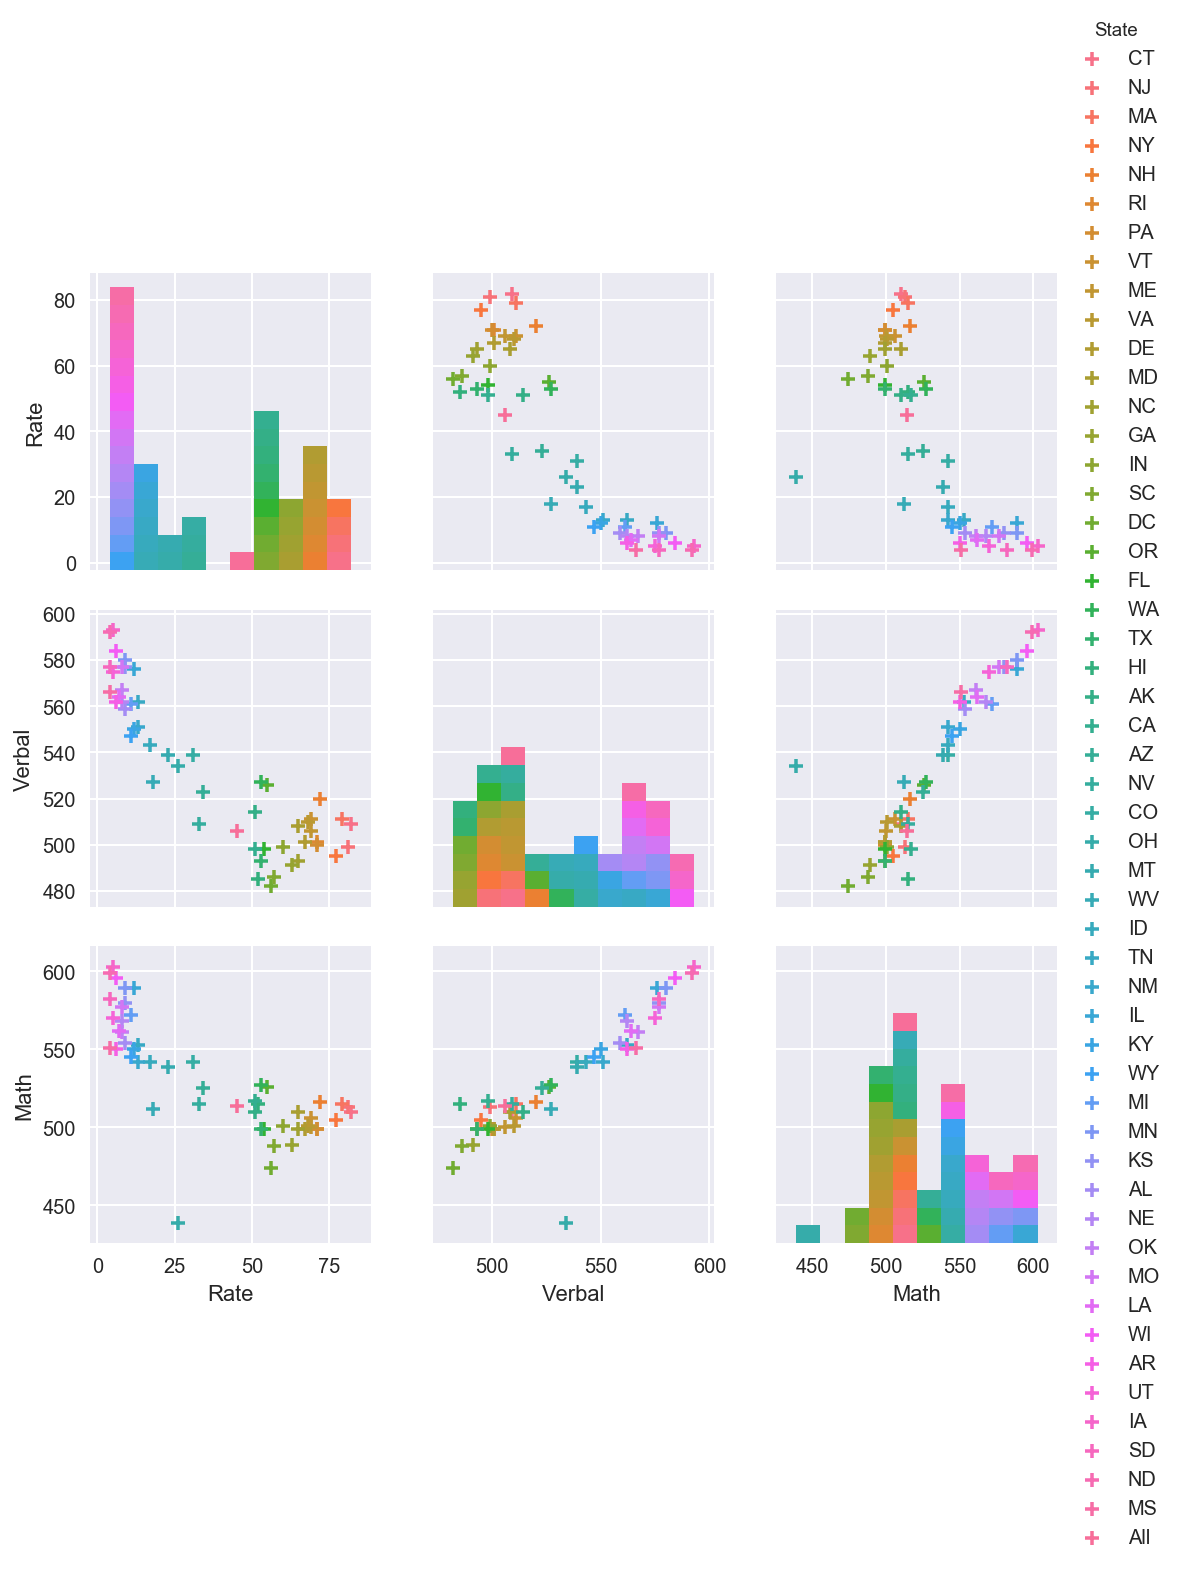

In [11]:
sns.pairplot(sat_df, hue='State', markers="+")
print("""Observations:
Rate x Verbal and Rate x Math have a general negative correlation. 
Math x Verbal has a general positive correlation
""")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

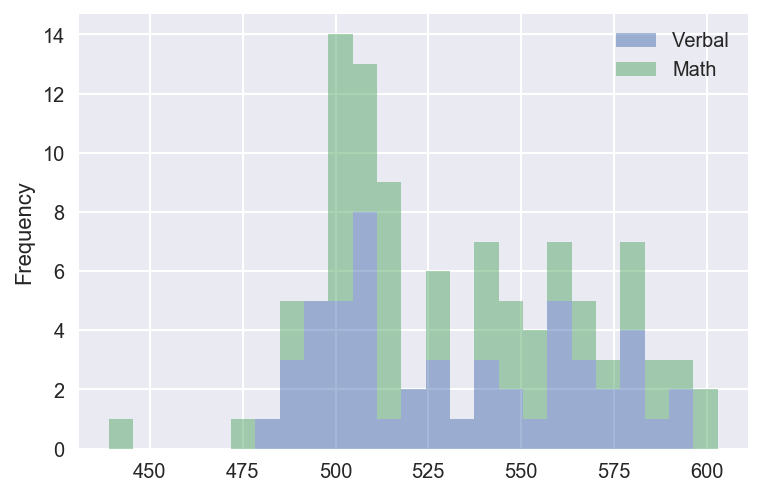

In [12]:
#plt.style.use('ggplot') # what is this?

sat_df[['Verbal', 'Math']].plot.hist(alpha=0.5, stacked=True, bins=25)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

The boxplot makes comparing the high, low, and mid of the verbal and math
scores much more easily than the histogram or the scatterplot
 
Plotting rate, because it's on a different score level, throws
off the values and doesn't compare to Verbal and Math.


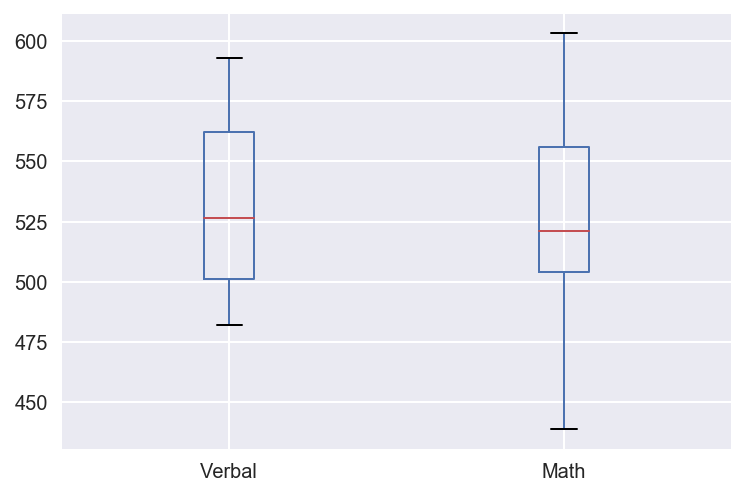

In [13]:
sat_df[['Verbal', 'Math']].plot.box()

print('The boxplot makes comparing the high, low, and mid of the verbal and math'),
print('scores much more easily than the histogram or the scatterplot')
print(' ')
print("Plotting rate, because it's on a different score level, throws"),
print("off the values and doesn't compare to Verbal and Math.")

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


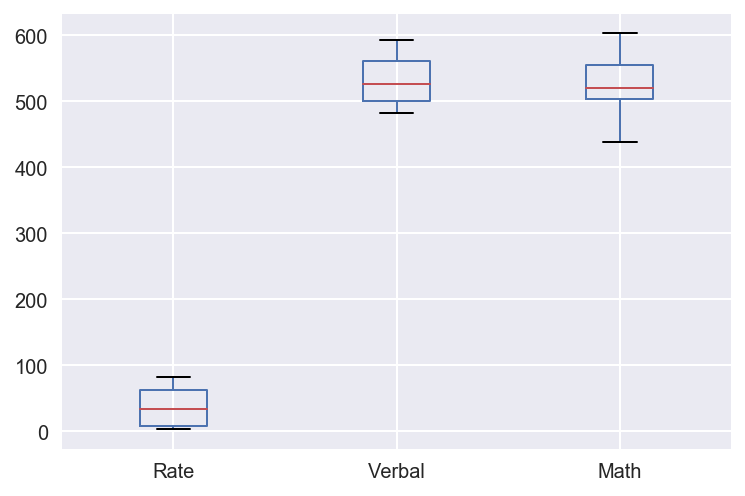

In [14]:
sat_df.plot.box()
# maybe as percentages? come back to this

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
avg = np.mean(sat_df['Verbal'])



st_sum = 0
for n in sat_df['Verbal']:
     if n > avg:
        st_sum = (st_sum + 1)   
#         return st_sum
#### SyntaxError: 'return' outside funciton
print(st_sum)
print("The distribution of the Verbal scores is even because 24 states are above the average")
print("making around half above, half below.")

24
The distribution of the Verbal scores is even because 24 states are above the average
making around half above, half below.


### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
#med = np.median(sat_df['Verbal'])
med2 = sat_df['Verbal'].median()

#new_df = sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()]

st_med = 0
for n in sat_df['Verbal']:
     if n > med2:
        st_med = (st_sum + 1)   
#         return st_sum

print(st_med)
print("Same as above, the distribution of the Verbal scores is even because 25")
print("states are above the median making around half above, half below.")

25
Same as above, the distribution of the Verbal scores is even because 25
states are above the median making around half above, half below.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
sat_df['Verbal - Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
# If Verb > Math, +
# If Verb < Math, -
diff10_df = sat_df[sat_df['Verbal - Math'] > 5]
s1 = diff10_df.sort_values('Verbal - Math', ascending=False)

s1.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [19]:
# 2
diff10m_df = sat_df[sat_df['Verbal - Math'] < -7]
s2 = diff10m_df.sort_values('Verbal - Math')

s2.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


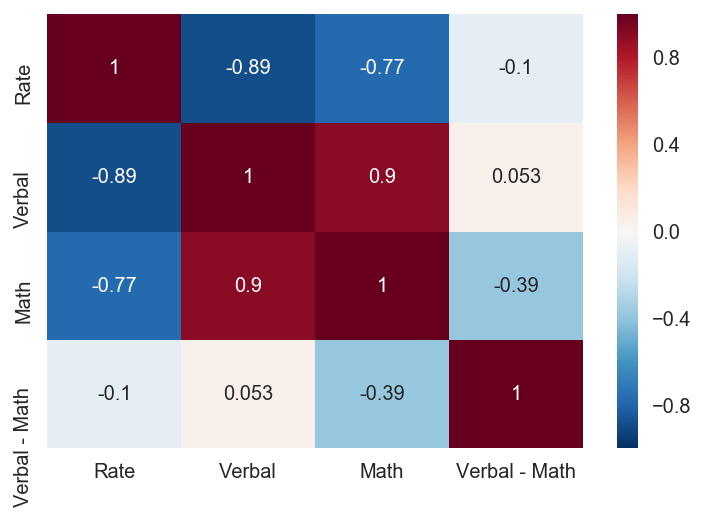

In [20]:
sns.heatmap(sat_df[['Rate','Verbal', 'Math', 'Verbal - Math']].corr(), annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [21]:
print('''
For each column, the rows returned:
count - the number of rows
mean - the mean of the values in the column
std - the std of the values in the column
min - the minimum value of the values in the column
25% - the value that has 25% of the values below it and 75% above
50% - the value that indicates 50% of the values above and 50% of the 
values below. Aka the MEDIAN.
75% - the value that has 75% of the values below it and 25% above
max - the maximum value of the values in the column
''')
sat_df.describe()


For each column, the rows returned:
count - the number of rows
mean - the mean of the values in the column
std - the std of the values in the column
min - the minimum value of the values in the column
25% - the value that has 25% of the values below it and 75% above
50% - the value that indicates 50% of the values above and 50% of the 
values below. Aka the MEDIAN.
75% - the value that has 75% of the values below it and 25% above
max - the maximum value of the values in the column



,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [22]:
# try using np.cov ? come back to this

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [23]:
drugs = pd.read_csv('./drug-use-by-age.csv')
#drugs.head()
drugs.replace(to_replace='-' ,value=0.0, inplace=True) 

In [27]:
#drugs.replace(to_replace='<=')

In [28]:
drugs.head(20)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [29]:
print("Cleaned nulls and '-'s with 0's")

Cleaned nulls and '-'s with 0's


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [30]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

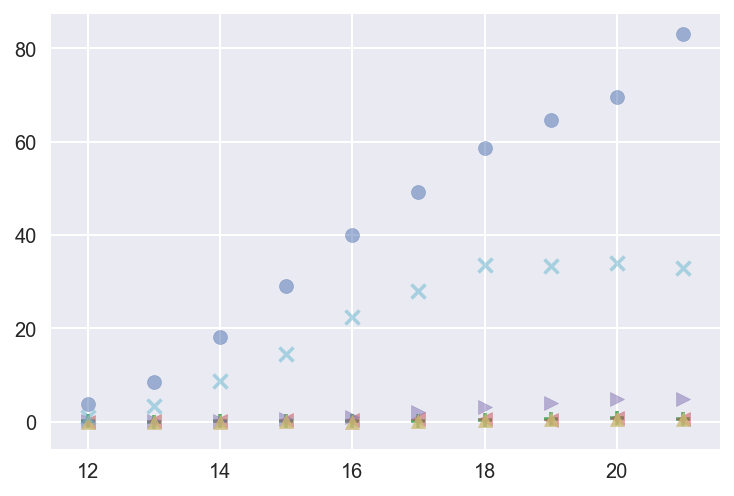

In [31]:
drugs.dtypes
#drugs[['age', 'n','alcohol-use']].head(20)
#drugs[['age', 'n','meth-use','meth-frequency']].head(20)
#drugs.head(20)
sns.plt.scatter(drugs['age'][:10], drugs['alcohol-use'][:10], alpha=0.5)
#sns.plt.scatter(drugs['age'][:10], drugs['alcohol-frequency'][:10], alpha=0.5)
sns.plt.scatter(drugs['age'][:10], drugs['heroin-use'][:10], marker='+')
sns.plt.scatter(drugs['age'][:10], drugs['meth-use'][:10], marker='<', alpha=0.5)
sns.plt.scatter(drugs['age'][:10], drugs['cocaine-use'][:10], marker='>', alpha=0.5)
sns.plt.scatter(drugs['age'][:10], drugs['crack-use'][:10], marker='^', alpha=0.8)
sns.plt.scatter(drugs['age'][:10], drugs['marijuana-use'][:10], marker='x', alpha=0.5)
#sns.plt.scatter(drugs['age'][:10], drugs['marijuana-frequency'][:10], marker='x', alpha=0.5)
#drugs.head(20)
#drugs['age'].iloc[:10]
#drugs['age'][:10]

In [32]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [33]:
print(
'''
From the data we can infer:
Alcohol and Marijuana use are typically higher than harder
drugs such as cocaine, heroin, and meth use for ages 12-21.
'''
)


From the data we can infer:
Alcohol and Marijuana use are typically higher than harder
drugs such as cocaine, heroin, and meth use for ages 12-21.



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables** <br>
`"What is the trend for ages above 21?"
Deliverables: Numbers, chart`
<br>...

In [36]:
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [41]:
# Code
drugs.replace(to_replace='22-23',value=22, inplace=True)
drugs.replace(to_replace='24-25',value=24, inplace=True) 
drugs.replace(to_replace='26-29',value=26, inplace=True) 
drugs.replace(to_replace='30-34',value=30, inplace=True) 
drugs.replace(to_replace='35-49',value=35, inplace=True) 
drugs.replace(to_replace='50-64',value=50, inplace=True) 
drugs.replace(to_replace='65+' ,value=65, inplace=True) 

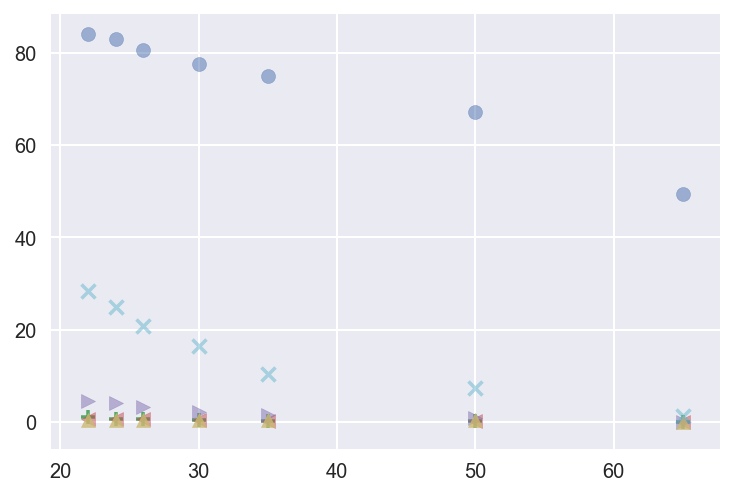

In [42]:
sns.plt.scatter(drugs['age'][10:], drugs['alcohol-use'][10:], alpha=0.5)
sns.plt.scatter(drugs['age'][10:], drugs['heroin-use'][10:], marker='+')
sns.plt.scatter(drugs['age'][10:], drugs['meth-use'][10:], marker='<', alpha=0.5)
sns.plt.scatter(drugs['age'][10:], drugs['cocaine-use'][10:], marker='>', alpha=0.5)
sns.plt.scatter(drugs['age'][10:], drugs['crack-use'][10:], marker='^', alpha=0.8)
sns.plt.scatter(drugs['age'][10:], drugs['marijuana-use'][10:], marker='x', alpha=0.5)


**Report** <br>
```
Ages 22 = Range 22-23
     24 =       24-25
     26 =       26-29
     30 =       30-34
     35 =       35-49
     50 =       50-64
     65 =       65+
     
The above chart shows us that the trend for above 21 
is the declination of all drug use. 
```
...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.